<a href="https://colab.research.google.com/github/rashmi0852/Bike_Sharing_Demand_Prediction/blob/main/Indivisual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    -  Regression
##### **Contribution**    - Individual
##### **Name**            - Rashmiranjan Nayak


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/rashmi0852/Bike_Sharing_Demand_Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [206]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar



### Dataset Loading

In [207]:
# Load Dataset
bike_dataset=pd.read_csv("SeoulBikeData.csv",encoding='ISO-8859-1')

### Dataset First View

In [208]:
# Dataset First Look
bike_dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [209]:
bike_dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [210]:
#Columns count

print("columns of dataset---",bike_dataset.columns)
print("\n\ncolumns count=",len(bike_dataset.columns))

columns of dataset--- Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


columns count= 14


In [211]:
#Rows count

print("Rows count=",len(bike_dataset.axes[0]))


Rows count= 8760


In [212]:
bike_dataset.shape

(8760, 14)

### Dataset Information

In [213]:
# Dataset Info
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [214]:
# Dataset Duplicate Value Count

duplicate_values=bike_dataset.duplicated().sum()
print("Duplicate rows in bike Rental dataset:",duplicate_values)


Duplicate rows in bike Rental dataset: 0


#### Missing Values/Null Values

In [215]:
# Missing Values/Null Values Count

# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
print(bike_dataset.isnull().sum())

Missing Values in each column
------------------------------
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [283]:
# percentage of missing value in Bike Rental dataset

missing_percent =round( (bike_dataset.isnull().mean())*100,2)
print (f"Missing Values % in each column"+"\n" + "--"*15)
print(missing_percent)

Missing Values % in each column
------------------------------
Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64


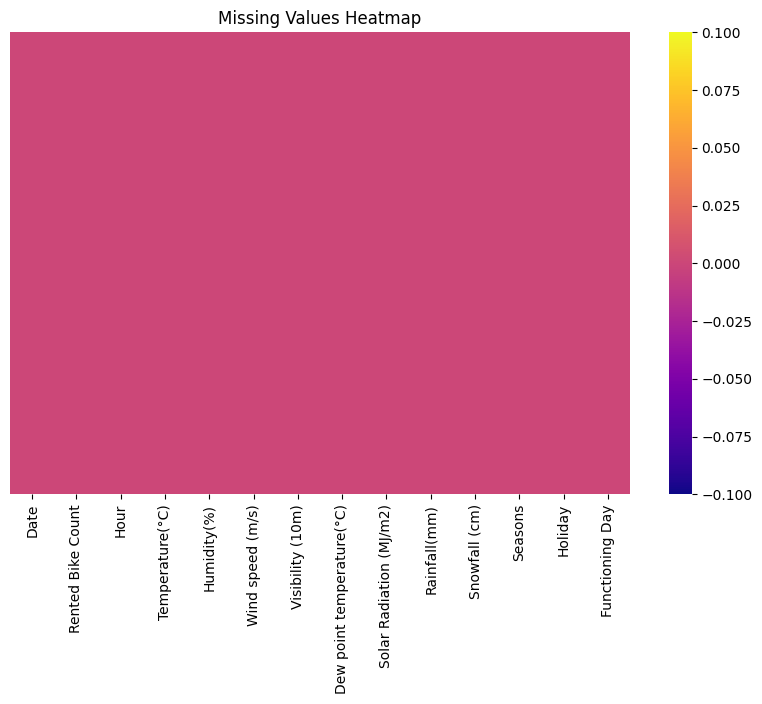

In [285]:
# Visualizing the missing values

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(bike_dataset.isnull(), cmap='plasma',annot=False,yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


####1. Why did you pick the specific chart?

A heatmap was chosen as the visualization method for displaying missing values in the dataset due to its effectiveness in providing a clear and concise representation of missing data. Heatmaps use color gradients to distinguish between missing and non-missing values, making it easy to identify areas with missing data at a glance. This visualization is efficient for datasets with multiple columns, allowing for a quick overview of missing values across variables. Heatmaps offer customization options for color schemes, enhancing visibility and aiding in data analysis. Overall, heatmaps are a widely accepted and practical choice for visualizing missing data patterns in datasets.

####2. What are the insights found from the chart?

Given that there are `no missing values` in the dataset, the heatmap used for visualizing missing values will show a uniform pattern with no missing data indicated. Therefore, there are no specific insights to draw from the chart in this case.



### What did you know about your dataset?

By exploring SeoulBikeRental dataset following insights were found

The dataset has **8760** Records & **16** Features . Features are described bellow-

* **Date** :  Bike rental date(year-month-day)
* **Rented_Bike_Count** - Each hour Bike rented count
* **Hour** - Hour of the day(0-23)
* **Temperature(°C)** -Temperature of the day(celcious)
* **Humidity(%)** - Humidity measure (%)
* **Windspeed(m/s)** -  Speed of wind(m/s)
* **Visibility(10m)** - Visiblity measure
* **Dew point temperature(°C)** - Dew point temperature measure
* **Solar Radiation (MJ/m2)** - Solar radiation measure
* **Rainfall(mm)** - Rainfall in mm
* **Snowfall (cm)** - Snowfall measure(cm)
* **Seasons** - Seasons of year (spring,summer,fall,winter)
* **Holiday** - Whether  a holiday or not
* **Functional Day** - Whether functional day or not

No such missing value as well as duplicate data were found from the data set

Also we found that among all 16 features
* **Functional Day**,**Holiday**,**Seasons** ,**Date** are **4** categorical columns where **Date** need to be converted to `datetype` to extract `day,month,year` values & other 3 to numerical columns through encoding technique.
* Rest **10** are numerical coulmns

##Changing Date Datatype

In [216]:
##keeping original copy safe
bike_df=bike_dataset.copy()

In [217]:
##Converting to date type
bike_df['Date'] = pd.to_datetime(bike_df['Date'], infer_datetime_format=True)

In [218]:
##Extracting date, month, year from date and adding to dataset

#Extracting month from date column
bike_df['Month'] = pd.DatetimeIndex(bike_df['Date']).month
bike_df['Month'] = bike_df['Month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
bike_df['Day'] = bike_df['Date'].dt.day_name()

#Extracting year
bike_df['Year'] = bike_df['Date'].dt.year

#Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekdays_or_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017,0


In [219]:
##Drop date column
bike_df.drop(["Date","Day"],axis=1,inplace=True)

## ***2. Understanding Your Variables***

In [220]:
# Dataset Columns
print(bike_df.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'Weekdays_or_weekend'],
      dtype='object')


For readablity & ease of use few column needs to be renamed


In [221]:
#converting few names for convenience
bike_df.rename({"Temperature(°C)": "Temperature",
                 "Humidity(%)": "Humidity",
                 "Wind speed (m/s)": "Wind_speed",
                 "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_radiation",
                "Rainfall(mm)": "Rainfall",
                "Snowfall (cm)": "Snowfall",
                 "Functioning Day":"Functioning_day",
                "Rented Bike Count": "Rented_bike_count"},
                axis = "columns", inplace = True)

In [222]:
print(bike_df.columns)

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'Month', 'Year',
       'Weekdays_or_weekend'],
      dtype='object')


In [223]:
# Dataset Describe

numerical_columns = ['Rented_bike_count', 'Temperature',"Humidity", 'Wind_speed',
                     "Visibility","Dew_point_temperature","Solar_radiation","Rainfall","Snowfall"]
bike_df[numerical_columns].describe()

,Rented_bike_count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

* For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type.

* Extensive data cleaning is not required because the ranges of values in the numerical columns appear fair as well. However,columns like **Wind_speed** , **Dew_point_temperature**, **Solar_Radiation**, **Rainfall** and **Snowfall** appears to be skewed as their median (50 percentile) is much lower than the highest value.

* **Seasons**, **Holiday**, **Functioning_day** &**Month**  These categorical columns contain various levels, making them unsuitable for the describe() method.Numerical columns **Hour**,**Year** &**Weekdays_or_weekend** are behaving like categorical features so we can analyze their unique values and frequency counts to understand the distribution and diversity of properties.

### Check Unique Values for each variable.

Dataset contains 4 categorical columns **Seasons**, **Holiday**, **Functioning_day** &**Month**  it is necessary to check unique values for each column along with **Hour** ,**Weekdays_or_weekend**& **Year**.

In [224]:
# # Check Unique Values for Hour column
print("Hours=",bike_df["Hour"].unique())
#number of unique values in Hour column
print("Unique count=",bike_df["Hour"].nunique())

Hours= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique count= 24


In [225]:
# # Check Unique Values for seasons column
print("Seasons=",bike_df["Seasons"].unique())
#number of unique values in seasons column
print("Unique count=",bike_df["Seasons"].nunique())

Seasons= ['Winter' 'Spring' 'Summer' 'Autumn']
Unique count= 4


In [226]:
# # Check Unique Values for Holiday column
print("Holiday=",bike_df["Holiday"].unique())
#number of unique values in Holiday column
print("Unique count=",bike_df["Holiday"].nunique())

Holiday= ['No Holiday' 'Holiday']
Unique count= 2


In [227]:
# # Check Unique Values for Functioning_day column
print("Functioning_day=",bike_df["Functioning_day"].unique())
#number of unique values in Functioning_day column
print("Unique count=",bike_df["Functioning_day"].nunique())

Functioning_day= ['Yes' 'No']
Unique count= 2


In [228]:
# # Check Unique Values for Month column
print("Months=",bike_df["Month"].unique())
#number of unique values in Month column
print("Unique count=",bike_df["Month"].nunique())

Months= ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Unique count= 12


In [230]:
# # Check Unique Values for Weekdays_or_weekend column
print("Weekdays_or_weekend=",bike_df["Weekdays_or_weekend"].unique())
#number of unique values in Weekdays_or_weekend column
print("Unique count=",bike_df["Weekdays_or_weekend"].nunique())

Weekdays_or_weekend= [0 1]
Unique count= 2


In [231]:
# # Check Unique Values for Year  column
print("Years=",bike_df["Year"].unique())
#number of unique values in Year column
print("Unique count=",bike_df["Year"].nunique())

Years= [2017 2018]
Unique count= 2


### Outlier Detection

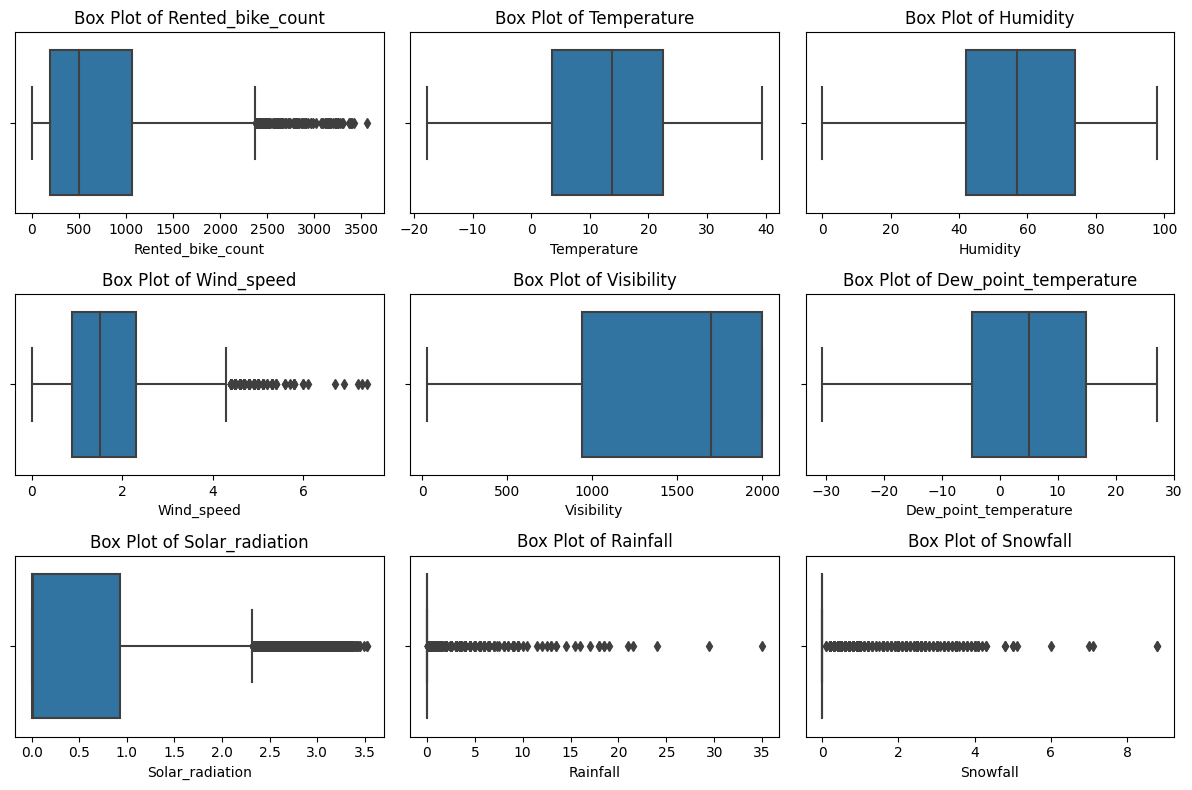

In [232]:
# Select numerical columns for box plots
numerical_columns = ['Rented_bike_count', 'Temperature',"Humidity", 'Wind_speed',
                     "Visibility","Dew_point_temperature","Solar_radiation","Rainfall","Snowfall"]
# Create subplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=bike_df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I selected the box plot for outlier identification due to its ability to present the distribution of data and potential outliers in a compact and visual manner. This makes it easy to spot data points that deviate significantly from the rest of the dataset. The box plot is commonly used for outlier analysis and allows for quick comparisons across multiple columns. It's a standard practice in data analysis for identifying and understanding outlier

##### 2. What is/are the insight(s) found from the chart?

The box plot visualization has provided valuable insights into potential outliers within the Seoul Bike Rental dataset:

* **Visibility**, **Dew_point_temperature**, **Temperature**, and **Humidity** features exhibit distributions without any noticeable outliers. These features seem to maintain a consistent and stable pattern without any extreme values.

* Conversely, the **Rented_bike_count**, **Wind_speed**, **Solar_radiation**, **Rainfall**, and **Snowfall** columns display data points that extend beyond the upper whisker, indicating that certain features have a higher-than-average number of bike rentals, possibly influenced by natural phenomena.

It's worth noting that the presence of outliers doesn't necessarily demand their removal. Instead, various techniques such as scaling or transforming data can be employed to mitigate their impact on subsequent analysis. However, further investigation is warranted to fully understand the context of these outliers and their potential implications on the overall analysis. Careful consideration and domain knowledge will be essential in determining how to handle these unusual data points effectively.

In [256]:
bike_df.shape

(8760, 16)

However most fo necessary steps where performed on the datset ,with some expansion ,deletion of some columns our feature set has expanded from **14** to **16**, while the number of records remains unchanged at 8760. With these preparations in place, we are now well-equipped to proceed with the analysis phase.



## 3. ***Data Wrangling***

### Data Wrangling Code

In [243]:

bike_df.head()

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,Month,Year,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,2017,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,2017,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,2017,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,2017,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,2017,0


To find meaningfull insights some oprations needs to be performed on above columns to understand features as well as patterns .

####Univariate analysis

In [259]:
#Question-1: Distribution of Rented bike?
# Summary Statistics for Rented bike
bike_summary = bike_df['Rented_bike_count'].describe()
print("Summary Statistics for Rented bikes:")
print(bike_summary)

Summary Statistics for Rented bikes:
count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented_bike_count, dtype: float64


In [242]:
#Question-2:Find peak & off-peak bike rental time?

# Group data by Hour & calculate bike count by sorting
hourly_rental_counts = bike_df.groupby('Hour')['Rented_bike_count'].mean()

#Sort the hourly rental counts in descending order
hourly_rental_counts=hourly_rental_counts.sort_values(ascending=False).astype("int")

#printing result
print (f"Bike rental by each hour \n" + "---"*8)
print(hourly_rental_counts)



Bike rental by each hour 
------------------------
Hour
18    1502
19    1195
17    1138
20    1068
21    1031
8     1015
16     930
22     922
15     829
14     758
13     733
12     699
23     671
9      645
7      606
11     600
0      541
10     527
1      426
2      301
6      287
3      203
5      139
4      132
Name: Rented_bike_count, dtype: int64


In [267]:
#Question-3: : Distribution among some important features?

# Define the categorical columns
categorical_columns=["Seasons","Holiday","Functioning_day","Month","Weekdays_or_weekend"]

# Create a dictionary to store the rental counts for each category
rental_counts_by_category = {}

# Calculate rental counts for each category in each categorical column
for column in categorical_columns:
    category_counts = bike_df.groupby(column)['Rented_bike_count'].sum().reset_index()
    rental_counts_by_category[column] = category_counts

# Print the rental counts for each category in each column
for column, counts_df in rental_counts_by_category.items():
    print(f"Rental counts for {column}\n" + "---"*12)
    print(counts_df)
    print("\n")


Rental counts for Seasons
------------------------------------
  Seasons  Rented_bike_count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169


Rental counts for Holiday
------------------------------------
      Holiday  Rented_bike_count
0     Holiday             215895
1  No Holiday            5956419


Rental counts for Functioning_day
------------------------------------
  Functioning_day  Rented_bike_count
0              No                  0
1             Yes            6172314


Rental counts for Month
------------------------------------
   Month  Rented_bike_count
0    Apr             556219
1    Aug             614190
2    Dec             311771
3    Feb             264112
4    Jan             287244
5    Jul             691339
6    Jun             706728
7    Mar             455037
8    May             665948
9    Nov             493412
10   Oct             626988
11   Sep             499326


Rental counts f

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

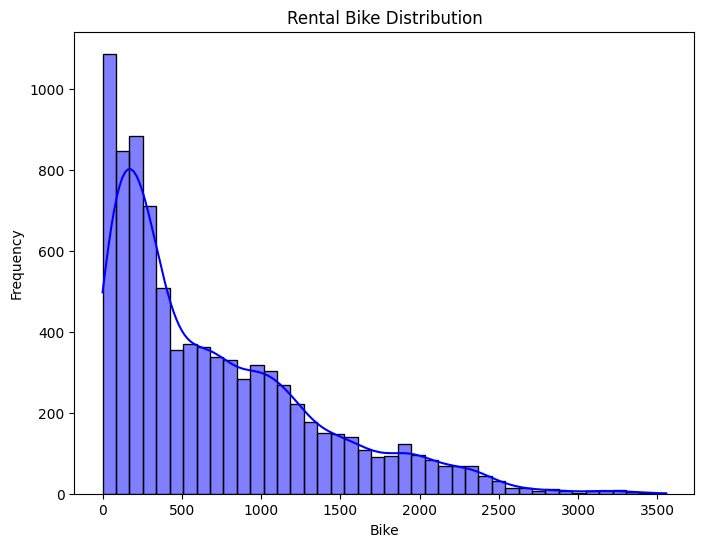

In [268]:
# Chart - 1 visualization code
#Question-1: Distribution of Rented bike?
plt.figure(figsize=(8, 6))
sns.histplot(bike_df['Rented_bike_count'], kde=True, color='blue')
plt.title('Rental Bike Distribution')
plt.xlabel('Bike')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart chosen for visualizing the distribution of rented bike counts is a histogram. Here's why a histogram is a suitable choice for this type of data:

1. **Continuous Data Distribution:** Histograms are particularly useful for visualizing the distribution of continuous or discrete data with a wide range of values, such as bike rental counts.

2. **Frequency Distribution:** A histogram provides a clear representation of the frequency (count) of data points within different intervals or bins. This is essential for understanding how often certain rental counts occur.

3. **Skewness and Outliers:** Histograms can reveal important information about the skewness (whether the data is skewed to the left or right) and the presence of outliers in the dataset.

4. **Density Estimation:** The KDE (Kernel Density Estimate) overlay on the histogram provides a smoothed estimate of the probability density function, offering a more continuous view of the data distribution.






##### 2. What is/are the insight(s) found from the chart?

The histogram of rented bike counts, which is right-skewed, provides several insights:

1. **Most Rentals Are in Lower Counts:** The majority of bike rentals fall within lower count ranges. This is evident from the peak on the left side of the histogram. It suggests that there are many instances where a relatively small number of bikes are rented.

2. **Few Instances of High Rentals:** While most rentals are in the lower count range, there are relatively few instances of exceptionally high bike rentals. The long right tail of the histogram indicates that some days or events experience a significant surge in bike rentals.

3. **Positive Skewness:** The right-skewed nature of the distribution indicates positive skewness, meaning that the distribution is skewed to the right. This suggests that the data has a longer right tail, which is typical for count data in scenarios like bike rentals, where most days have a relatively stable and moderate number of rentals, but occasional peaks in demand lead to the higher counts.

4. **Potential Outliers:** The right tail of the histogram represents potential outliers or extreme values. These could be days with unusual circumstances, such as special events, holidays, or weather conditions, leading to exceptionally high bike rentals.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the right-skewed histogram of rented bike counts can indeed help create a positive business impact. However, there are also insights that, if not addressed, could lead to negative growth or operational challenges.

**Positive Business Impact:**

1. **Resource Allocation:** Understanding that the majority of rentals fall within lower count ranges allows for efficient resource allocation. Businesses can allocate the appropriate number of bikes and staff for typical days, ensuring that customers have a positive experience.

2. **Profit Optimization:** Recognizing that there are occasional spikes in demand (as indicated by the right tail of the histogram) allows businesses to optimize profitability. They can adjust pricing or promotional strategies during high-demand periods to maximize revenue.

3. **Customer Satisfaction:** Preparedness for occasional high-demand days ensures that customers can find available bikes when they need them. This leads to positive customer experiences and potentially repeat business.

**Negative Growth :**

1. **Operational Challenges:** Without proper planning, businesses may struggle to meet the sudden surge in demand during peak periods, potentially leading to operational inefficiencies.

2. **Loss of Revenue:** Failure to optimize pricing or promotions during high-demand periods may result in lost revenue opportunities. Competitors who adapt to such situations could gain an advantage.

3. **Resource Shortages:** Inadequate resource allocation on high-demand days can lead to bike shortages, customer frustration, and potentially lost business.

4. **Overhead Costs:** On the flip side, overallocating resources to anticipate peak demand every day can result in unnecessary overhead costs on days when demand remains moderate.



#### Chart - 2

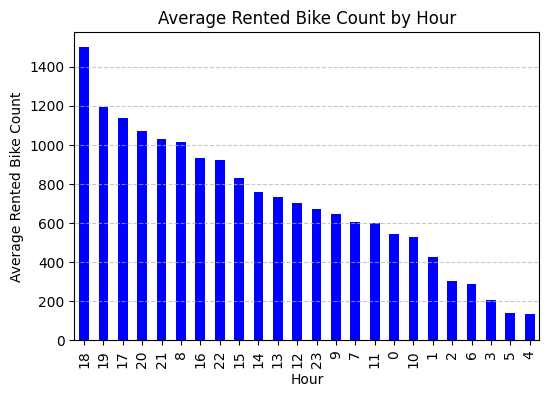

In [260]:
# Chart - 2 visualization code
#Question-1:Find peak & off-peak bike rental time?

# choose graph size
plt.figure(figsize=(6, 4))

#create bar plot
hourly_rental_counts .plot(kind='bar', color='blue')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Hour')
plt.xticks(hourly_rental_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a specific chart, which is a bar chart, for visualizing the average rented bike counts by hour because it is well-suited to address the objective of finding the peak bike rental time. Here's why a bar chart was chosen:

1. **Categorical Data:** The 'Hour' column represents categorical data, where each hour of the day is a category. Bar charts are particularly effective for visualizing distributions and comparisons within categorical data.

2. **Comparison:** Bar charts allow for easy comparison of the average rented bike counts for each hour. This makes it straightforward to identify the hour(s) with the highest average bike rental counts, which is the primary objective.

3. **Clear Representation:** Bar charts provide a clear and intuitive representation of data, making it easier for viewers to understand trends and variations. In this case, it allows for a quick visual assessment of which hours have the most and least bike rentals.



##### 2. What is/are the insight(s) found from the chart?

From above visualized bar plot following insights were emerged:



**1. Peak Bike Rental Time:**
   - The charts clearly reveal the peak bike rental time, which occurs **18-21** hours at afternoon time.
   - This indicates that the highest demand for rented bikes is typically between these hours, making it crucial for bike rental businesses to ensure sufficient bike availability and service during this period.

**2. Off-Peak Hours:**
   - Conversely,**1-4** hour, early-morning hours show the lowest average rented bike counts.
   - These hours can be considered off-peak times for bike rentals, and businesses can adjust staffing and maintenance schedules accordingly to optimize resources.

**3. Hourly Variations:**
   - The charts illustrate significant hourly variations in bike rental activity.
   - Peaks and troughs in rental counts suggest distinct patterns throughout the day, which can be valuable for businesses in planning and marketing.


In summary, these visualizations provide valuable insights into the temporal dynamics of bike rentals, offering actionable information for businesses to optimize their operations and cater to customer demand effectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of bike rental patterns by hour can indeed have a positive business impact for a bike rental company. However, it's important to analyze whether any insights may potentially lead to negative growth. Here's a breakdown:

**Positive Business Impact:**
- **Optimized Resource Allocation:** Understanding the peak bike rental time (18-21 hours) allows the business to allocate resources such as bikes, staff, and maintenance personnel more efficiently during high-demand periods. This ensures that customers have a positive experience with readily available bikes, which can lead to increased rentals and customer satisfaction.

- **Targeted Marketing:** Identifying hourly variations and peak hours provides an opportunity for targeted marketing efforts. The business can run promotions, discounts, or advertising campaigns during peak hours to attract more customers and boost revenue.

- **Enhanced User Experience:** By improving bike availability during peak times, the business can enhance the user experience, leading to customer loyalty and positive word-of-mouth recommendations.

**Negative Growth :**
- **Resource Shortages:** Failing to allocate sufficient resources during peak hours can result in bike shortages and dissatisfied customers. This can lead to negative growth as customers may turn to competitors or abandon bike rentals altogether due to unavailability.

- **Underutilized Resources:** On the other hand, overstaffing or over-maintaining bikes during off-peak hours (1-4 hours) can lead to increased operational costs without corresponding revenue. This inefficiency can negatively impact profitability.

- **Ineffective Marketing Spending:** If marketing efforts are not aligned with peak hours, the business may spend resources on campaigns that don't reach their intended audience. This could result in wasted marketing expenses.



#### Chart - 3

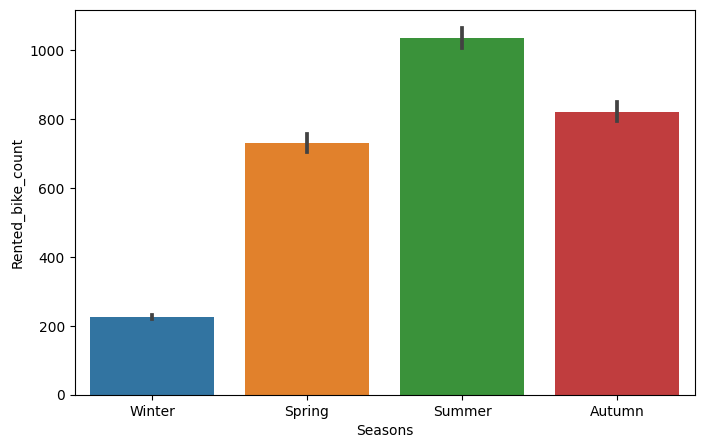

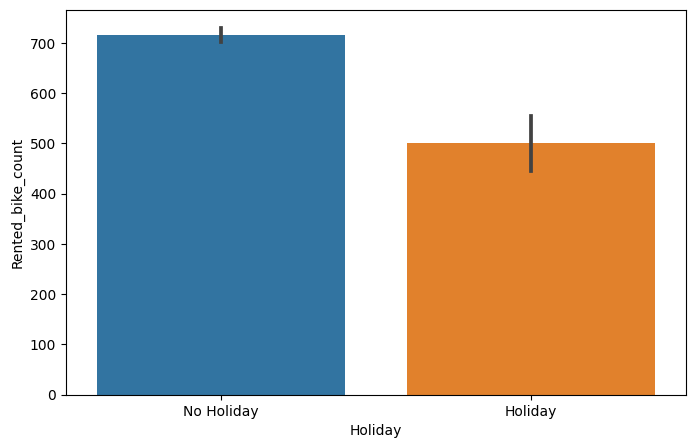

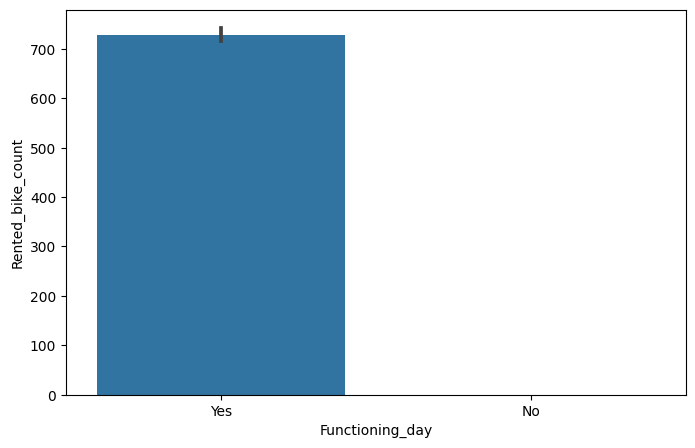

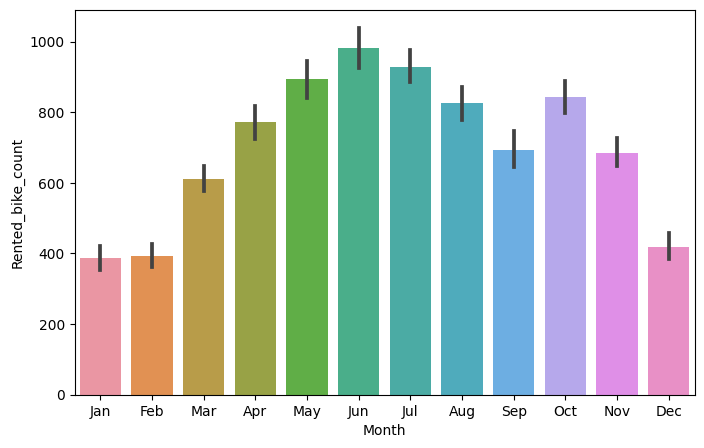

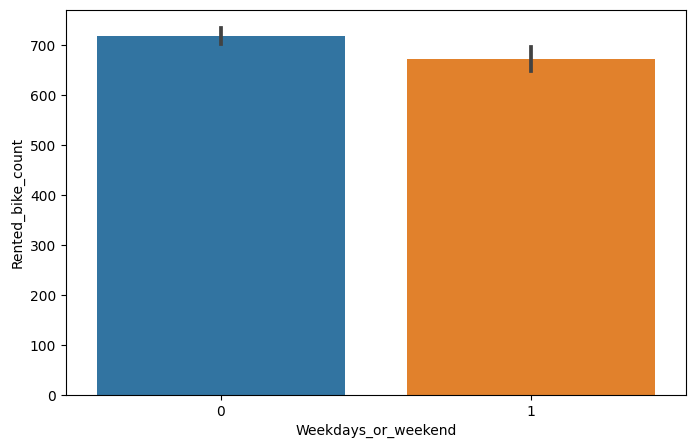

In [280]:
# Chart -3 visualization code
#Distribution among some important features?


# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    sns.barplot(x=bike_df[col],y=bike_df['Rented_bike_count'])

##### 1. Why did you pick the specific chart?

I choose the bar for the distribution of categorical variables (Seasons,Holiday,Functioning_day,Month,Weekdays_or_weekend) because it is a suitable plot for visualizing the frequency of each category in a categorical variable.

The bar plot that shows the number of occurrences of each category in a categorical variable. It provides an easy way to compare the frequencies of different categories and quickly identify the most common and least common categories.



##### 2. What is/are the insight(s) found from the chart?

The insights found from visualizing the distribution of the categorical variables ("Seasons," "Holiday," "Functioning_day," "Month," and "Weekdays_or_weekend") using bar plots are as follows:

1. **Seasons:**
   - The bar plot for "Seasons" reveals how bike rentals are distributed across different seasons (e.g., spring, summer, autumn, winter).
   - Insights can be drawn regarding which season sees the highest and lowest bike rentals. For *summer** have the highest rentals due to pleasant weather where as winter has lowest.

2. **Holiday:**
   - The "Holiday" bar plot shows how bike rentals vary on holidays versus non-holidays.
   - It provides insights into whether **Non-holidays** have a significant impact on bike rentals. Businesses can use this information for holiday-specific promotions or staffing adjustments.

3. **Functioning_day:**
   - The "Functioning_day" chart can reveal rental patterns on days when the bike rental station is functioning normally (yes) versus days when it's not (No).
   - This information helps in optimizing operations and maintenance schedules for non-functioning days.

4. **Month:**
   - The bar plot for "Month" displays the distribution of bike rentals across different months of the year.
   - Insights can be gained regarding monthly trends and seasonal variations in rental counts. For instance, **June** followed by **july** &**May**.

5. **Weekdays_or_weekend:**
   - This chart may show rental counts on weekdays(1) versus weekends(0).where **weekdays** have slightly higher bike counts
   - It helps assess whether there's a difference in bike rentals between weekdays and weekends, which can be valuable for staffing and marketing decisions.

Overall, these visualizations provide insights into how bike rentals are distributed among different categories within these important features. They can inform strategies for resource allocation, marketing, and operational decisions for bike rental businesses based on seasonal, holiday-related, and day-of-week patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of the categorical variables can indeed help create a positive business impact for a bike rental company. However, it's important to analyze whether any insights may potentially lead to negative growth. Here's a detailed evaluation:

**Positive Business Impact:**

1. **Seasonal Insights:** Understanding the seasonal distribution of bike rentals can be highly beneficial. It allows businesses to allocate resources and plan marketing strategies based on peak seasons. For example, they can increase bike availability and marketing efforts during the high-demand summer season, potentially leading to increased revenue and customer satisfaction.

2. **Non-Holiday Strategy:** The insight into how Non-holidays affect bike rentals can inform business decisions. Special promotions or staffing adjustments during Non-holidays can lead to higher rentals and positive customer experiences.

3. **Optimized Resource Allocation:** Knowing which days are functioning days and understanding the distribution of rentals on weekdays vs. weekends can help optimize resource allocation. More staff and bikes can be deployed during peak periods, enhancing the overall customer experience.

**Negative Growth :**

1. **Resource Allocation on Non-Functioning Days:** If the insights about non-functioning days are not acted upon, there might be a risk of inefficient resource allocation. The business could overspend on staff and maintenance during days when there is little demand.

2. **Holiday Impact:** Failing to adjust operations or promotions for Non-holidays could result in missed revenue opportunities. Customers might choose competitors or alternative transportation options if the business doesn't cater to the increased Non-holiday demand.

3. **Seasonal Overlook:** If the business doesn't adapt to seasonal variations in rentals, it could lead to revenue fluctuations and potential losses. Neglecting the importance of peak and off-peak seasons can impact profitability.

4. **Weekdays vs. Weekends:** Not considering the differences in rentals between weekdays and weekends might result in missed marketing opportunities or understaffing during high-demand weekdays, leading to customer dissatisfaction.



#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***